# Análisis Exploratorio de Datos

**Trabajo Fin de Máster**

**Sistema de predicción para prevenir la congestión en mostradores de facturación en aeropuertos**

Autor: David Cortés Alvarez

Máster en Inteligencia Artificial

## Librerías

In [1]:
# Tratamiento de Datos
# -----------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import qgrid

In [2]:
# Gráficos
# -----------------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [3]:
# Modelos
# -----------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.tree import export_graphviz

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [4]:
# Varios
# -----------------------------------------------------------------------------------
import random
import time
from math import sqrt

## Carga de Datos

Parámetros de entrada:

In [5]:
# Parámetros de entrada
Escalas_Seleccionadas = ['LPA', 'ACE', 'FUE', 'TFN', 'TFS', 'SPC', 'VDE','GMZ']
# Ruta de dataset a cargar
histModelo = "TFM_FileIN_Dataset_Training.csv"

Carga del Dataset: 

In [6]:
data = pd.read_csv(histModelo, header=0)

## Análisis Exploratorio

In [7]:
# Visualizamos los 5 primeros registros
print(data.head(5))

                  ID_VUELO  APD  APA       SEGMENTO CIA VUELO  \
0  NT0650D01M02Y2019GMZTFN  GMZ  TFN   Interinsular  NT  0650   
1  NT0110D01M02Y2019TFNLPA  TFN  LPA   Interinsular  NT  0110   
2  NT6651D01M02Y2019TFNVDE  TFN  VDE   Interinsular  NT  6651   
3  NT6307D01M02Y2019AGALPA  AGA  LPA  Internacional  NT  6307   
4  NT0421D01M02Y2019FUETFN  FUE  TFN   Interinsular  NT  0421   

                           FLOTA PROPIETARIO_VUELO    FECHA_SALIDA_PROG  ANIO  \
0       ATR72-BINTER CANARIAS-72   BINTER CANARIAS  01/02/2019 10:30:00  2019   
1       ATR72-BINTER CANARIAS-72   BINTER CANARIAS  01/02/2019 11:30:00  2019   
2  ATR72-600-CANARIAS AIRLINE-72  CANARIAS AIRLINE  01/02/2019 11:40:00  2019   
3   ATR72-600-BINTER CANARIAS-72   BINTER CANARIAS  01/02/2019 14:15:00  2019   
4  ATR72-600-CANARIAS AIRLINE-72  CANARIAS AIRLINE  01/02/2019 16:35:00  2019   

   ...  OCUPACION     SECTOR  CMAX PAX_V  PAX_F PAX_M A180 A120  A60  A0  
0  ...         49   Canarias  72.0  35.0   21.0

In [8]:
print('Númmero de Filas y columnas:',data.shape)
print('Columnas:',data.columns)

Númmero de Filas y columnas: (145409, 30)
Columnas: Index(['ID_VUELO', 'APD', 'APA', 'SEGMENTO', 'CIA', 'VUELO', 'FLOTA',
       'PROPIETARIO_VUELO', 'FECHA_SALIDA_PROG', 'ANIO', 'MES', 'DIA',
       'DIA_SEMANA', 'HORA', 'FESTIVO', 'MATR', 'FRANJA_HORARIA', 'OPERADOR',
       'OFERTA', 'PAX', 'OCUPACION', 'SECTOR', 'CMAX', 'PAX_V', 'PAX_F',
       'PAX_M', 'A180', 'A120', 'A60', 'A0'],
      dtype='object')


In [9]:
# Verificamos la estructura del DataSet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145409 entries, 0 to 145408
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID_VUELO           145409 non-null  object 
 1   APD                145409 non-null  object 
 2   APA                145409 non-null  object 
 3   SEGMENTO           145409 non-null  object 
 4   CIA                145409 non-null  object 
 5   VUELO              145409 non-null  object 
 6   FLOTA              145409 non-null  object 
 7   PROPIETARIO_VUELO  145409 non-null  object 
 8   FECHA_SALIDA_PROG  145409 non-null  object 
 9   ANIO               145409 non-null  int64  
 10  MES                145409 non-null  int64  
 11  DIA                145409 non-null  int64  
 12  DIA_SEMANA         145409 non-null  int64  
 13  HORA               145409 non-null  object 
 14  FESTIVO            145409 non-null  int64  
 15  MATR               145409 non-null  object 
 16  FR

In [10]:
# Hacemos un ajuste de tipo
data['VUELO'] = data['VUELO'].astype('str')

In [11]:
# Analizamos cada elemento y sus valores
for column in data:
    unique_vals =np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 20:
        print ('The number of values for feature {}:{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print ('The number of values for feature {}:{}'.format(column, nr_values))

The number of values for feature ID_VUELO:145409
The number of values for feature APD:48
The number of values for feature APA:43
The number of values for feature SEGMENTO:4 -- ['Domestico' 'Interinsular' 'Internacional' 'Schengen']
The number of values for feature CIA:1 -- ['NT']
The number of values for feature VUELO:984
The number of values for feature FLOTA:7 -- ['ATR72-600-BINTER CANARIAS-72' 'ATR72-600-CANARIAS AIRLINE-72'
 'ATR72-BINTER CANARIAS-72' 'ATR72-CANARYFLY-72' 'CRJ1000-MEDOPS-100'
 'Desconocido' 'EMBRAER E195-E2-BINTER CANARIAS-132']
The number of values for feature PROPIETARIO_VUELO:4 -- ['BINTER CANARIAS' 'CANARIAS AIRLINE' 'MEDOPS' 'NAYSA']
The number of values for feature FECHA_SALIDA_PROG:71342
The number of values for feature ANIO:3 -- [2019 2020 2021]
The number of values for feature MES:12 -- [ 1  2  3  4  5  6  7  8  9 10 11 12]
The number of values for feature DIA:31
The number of values for feature DIA_SEMANA:7 -- [1 2 3 4 5 6 7]
The number of values for feat

In [12]:
# Realizamos un descripción estadística
data[['OFERTA','PAX','OCUPACION','CMAX','PAX_V','PAX_F','PAX_M','A180','A120','A60','A0']].describe()

,OFERTA,PAX,OCUPACION,CMAX,PAX_V,PAX_F,PAX_M,A180,A120,A60,A0
count,145409.000000,144215.000000,145409.000000,145395.000000,143503.000000,143503.000000,134248.000000,145409.000000,145409.000000,145409.000000,145409.000000
mean,73.241925,53.840343,72.388951,75.299673,53.286182,31.782625,29.027635,8.197457,5.500863,8.422739,4.041407
std,14.236936,19.566858,25.783178,11.849054,19.273420,15.706277,13.593635,9.522505,6.836754,7.418138,6.845051
min,0.000000,0.000000,0.000000,72.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,40.000000,54.000000,72.000000,40.000000,21.000000,19.000000,1.000000,0.000000,3.000000,0.000000
50%,72.000000,59.000000,79.000000,72.000000,58.000000,32.000000,29.000000,5.000000,3.000000,7.000000,0.000000
75%,72.000000,69.000000,94.000000,72.000000,68.000000,42.000000,39.000000,12.000000,9.000000,12.000000,6.000000
max,136.000000,132.000000,144.000000,132.000000,132.000000,125.000000,125.000000,96.000000,95.000000,95.000000,69.000000


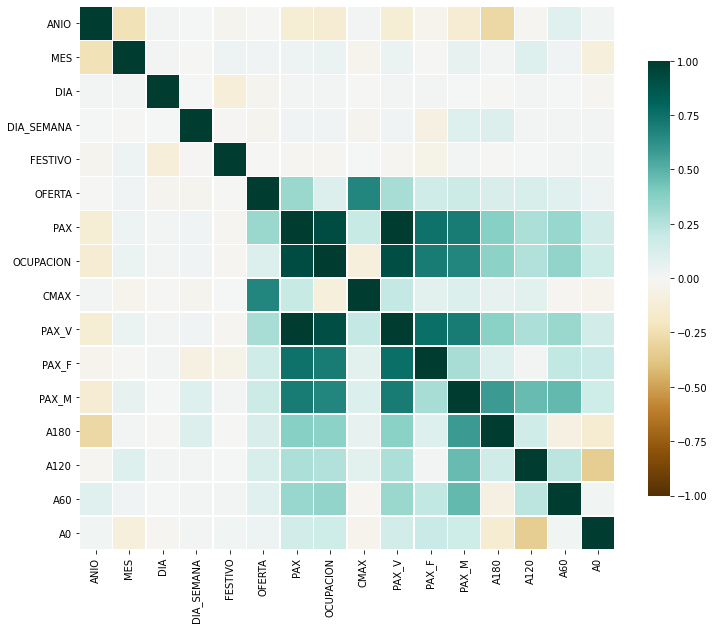

In [13]:
# Matrix de correlación
heatmap = data.corr()
plt.figure(figsize=(12, 10))
g = sns.heatmap(heatmap, cmap="BrBG", vmin= -1, vmax=1,
           linewidth=0.3, cbar_kws={"shrink": .8})

### Estudio de datos (Gráficos)

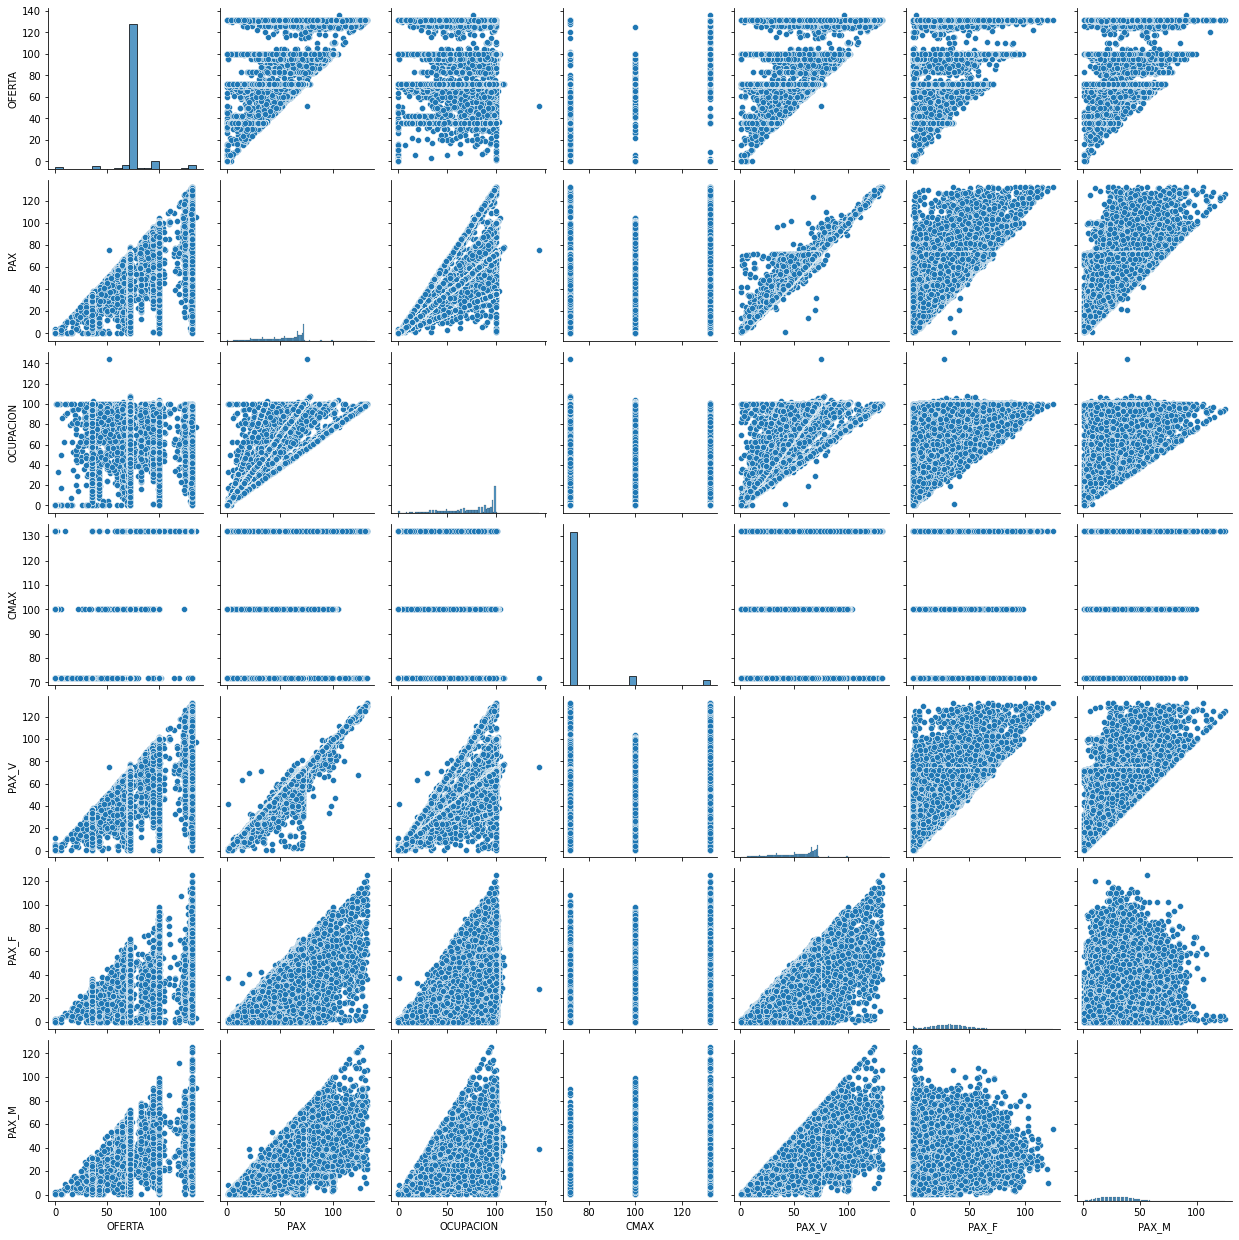

In [14]:
# Visualizamos los datos con la librería Seaborn
data_show = data[['OFERTA','PAX','OCUPACION','CMAX','PAX_V','PAX_F','PAX_M']]

g = sns.pairplot(data_show)

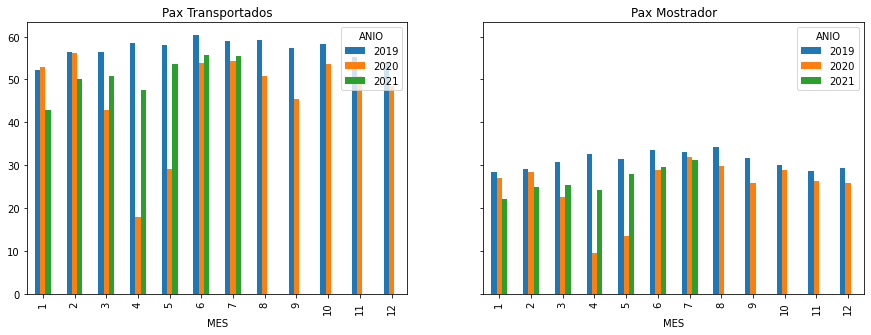

In [15]:
df_pivot_1 = pd.pivot_table(data,values="PAX",index="MES",columns="ANIO",aggfunc=np.mean)
df_pivot_2 = pd.pivot_table(data,values="PAX_M",index="MES",columns="ANIO",aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)
df_pivot_1.plot(ax=axes[0],kind="bar", title="Pax Transportados")
df_pivot_2.plot(ax=axes[1],kind="bar", title="Pax Mostrador")

plt.show()

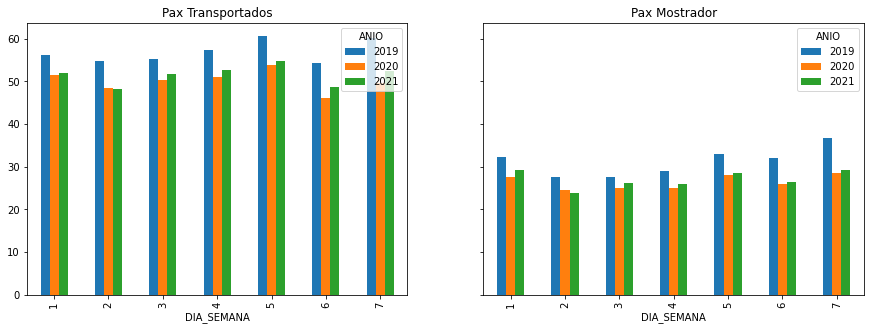

In [16]:
df_pivot_1 = pd.pivot_table(data,values="PAX",index="DIA_SEMANA",columns="ANIO",aggfunc=np.mean)
df_pivot_2 = pd.pivot_table(data,values="PAX_M",index="DIA_SEMANA",columns="ANIO",aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)
df_pivot_1.plot(ax=axes[0],kind="bar", title="Pax Transportados")
df_pivot_2.plot(ax=axes[1],kind="bar", title="Pax Mostrador")

plt.show()

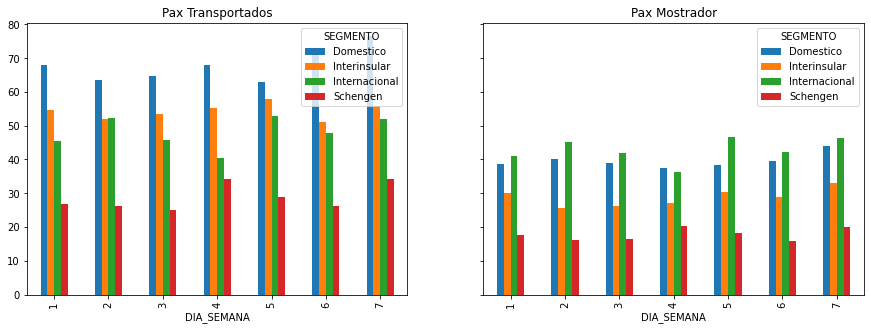

In [17]:
df_pivot_1 = pd.pivot_table(data,values="PAX",index="DIA_SEMANA",columns="SEGMENTO",aggfunc=np.mean)
df_pivot_2 = pd.pivot_table(data,values="PAX_M",index="DIA_SEMANA",columns="SEGMENTO",aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)
df_pivot_1.plot(ax=axes[0],kind="bar", title="Pax Transportados")
df_pivot_2.plot(ax=axes[1],kind="bar", title="Pax Mostrador")

plt.show()

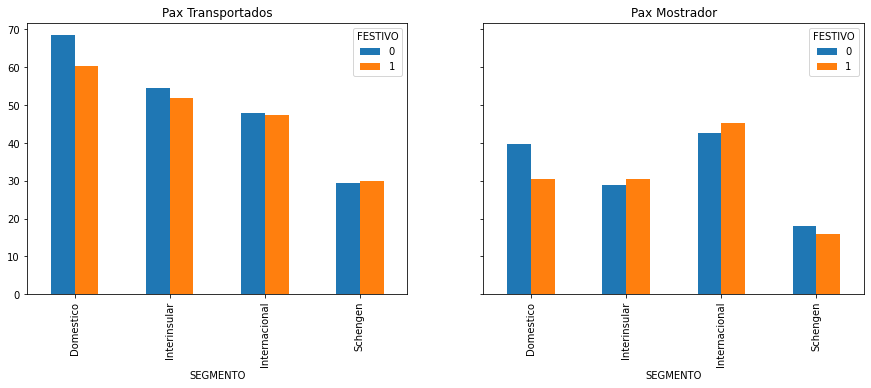

In [18]:
df_pivot_1 = pd.pivot_table(data,values="PAX",index="SEGMENTO",columns="FESTIVO",aggfunc=np.mean)
df_pivot_2 = pd.pivot_table(data,values="PAX_M",index="SEGMENTO",columns="FESTIVO",aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)
df_pivot_1.plot(ax=axes[0],kind="bar", title="Pax Transportados")
df_pivot_2.plot(ax=axes[1],kind="bar", title="Pax Mostrador")

plt.show()

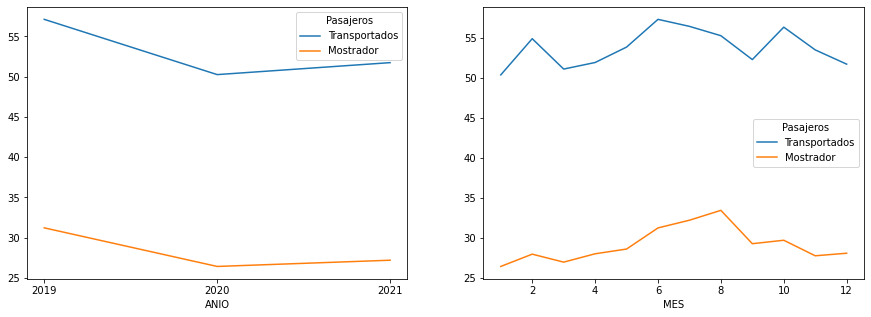

In [19]:
df_pivot_1 = pd.pivot_table(data,values="PAX",index="ANIO",aggfunc=np.mean)
df_pivot_2 = pd.pivot_table(data,values="PAX_M",index="ANIO",aggfunc=np.mean)
df_pivot_3 = pd.pivot_table(data,values="PAX",index="MES",aggfunc=np.mean)
df_pivot_4 = pd.pivot_table(data,values="PAX_M",index="MES",aggfunc=np.mean)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
df_pivot_1.plot(ax=axes[0])
df_pivot_2.plot(ax=axes[0])
df_pivot_3.plot(ax=axes[1])
df_pivot_4.plot(ax=axes[1])
axes[0].legend(['Transportados','Mostrador'], title = "Pasajeros")
axes[1].legend(['Transportados','Mostrador'], title = "Pasajeros")

axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

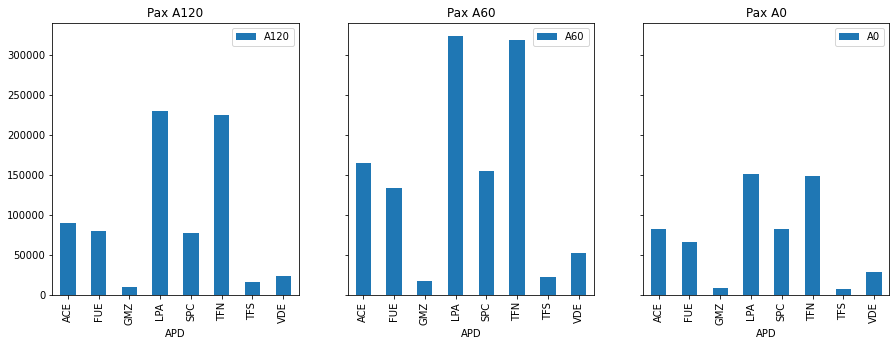

In [20]:
data_show = data[data['APD'].isin(Escalas_Seleccionadas)]

dfp_A120 = pd.pivot_table(data_show,values="A120",index="APD",aggfunc=np.sum)
dfp_A60 = pd.pivot_table(data_show,values="A60",index="APD",aggfunc=np.sum)
dfp_A0 = pd.pivot_table(data_show,values="A0",index="APD",aggfunc=np.sum)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)
dfp_A120.plot(ax=axes[0],title="Pax A120",kind="bar")
dfp_A60.plot(ax=axes[1],title="Pax A60",kind="bar")
dfp_A0.plot(ax=axes[2],title="Pax A0",kind="bar")

plt.show()

La fuerte tendencia en el primer segmento refuerza la idea de realizar el checkin de todos los vuelos (escalas y regreso) posteriores al primer vuelo de salida, por lo que el aeropuerto será una característica importante a tener en cuenta para descubrir más casos. 

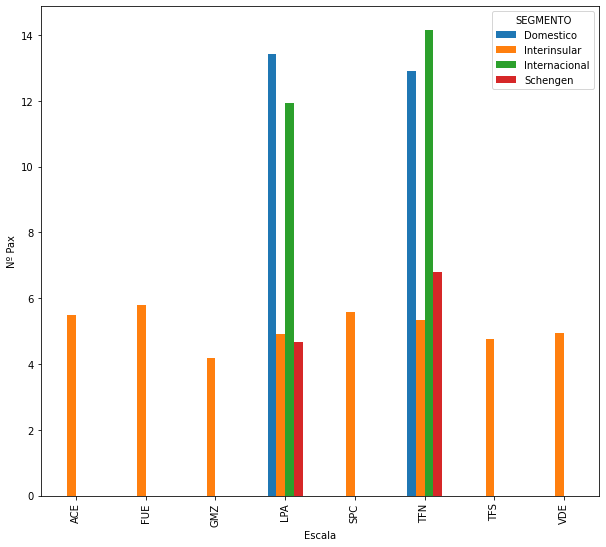

In [21]:
df_pivot = pd.pivot_table(data_show,values="A120",index="APD",columns="SEGMENTO",aggfunc=np.mean)
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(10, 9)
ax.set_xlabel("Escala")
ax.set_ylabel("Nº Pax")
plt.show()

En base a esta gráfica determinamos que los vuelos internacionales y domésticos son los que más antelación de facturación tienen, por lo que debe haber un regla que sigue algún patrón de relación. Intentaremos filtrar por alguna característica más como la flota (ya que la compañía tiene la particularidad que un determinado tipo de avión son los que hacen los trayectos más largos)

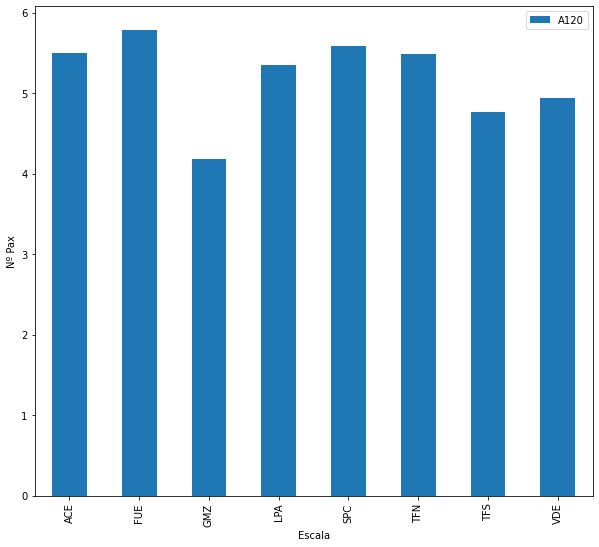

In [22]:
df_pivot = pd.pivot_table(data_show,values="A120",index="APD",aggfunc=np.mean)
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(10, 9)
ax.set_xlabel("Escala")
ax.set_ylabel("Nº Pax")
plt.show()

## Data Pre-Processing 
En esta sección se realizará un Análisis Exploratorio de los Datos para verificar si es necesario el tratamiento de NULOS, Datos Erróneos, Outliers y confirmar la relación correcta entre ellos. Técnicas posibles a utilizar: 
- Data Cleansing & Data Aggregation
- Joins
- Normalize & Scale 
- Convert categorical features into numeric representation
- Feature Selection
- Feature Engineering

### Data Cleaning & Data Aggregation 

In [23]:
# Eliminamos aquellos registros que no son de los aeropuertos a tratar
data = data[data.APD.isin(Escalas_Seleccionadas)]

In [24]:
data.shape

(137946, 30)

In [25]:
# Eliminamos los que no tienen ocupación
data = data[(data['OFERTA'] > 0) & (data['OCUPACION'] > 0)]

In [26]:
data.shape

(136260, 30)

In [27]:
# Quitamos los 0 de la izquierda al identificador de vuelo
data['VUELO'] = data['VUELO'].str.replace(r'^(0+)(?!$)', '', regex=True).fillna('0')
data['VUELO'] = data['VUELO'].astype(int)

In [28]:
# Modificamos la columna de Hora para transformarla a minutos del día
data.insert(9, 'SALIDA_MINUTOS_DIA', 
            data.HORA.astype(str).apply(lambda x: x.split(':')).apply(lambda x: int(x[0]) * 60 + int(x[1])))

# Borramos el campo HORA al tener en nuevo campo SALIDA_MINUTOS_DIA
data = data.drop(columns=['HORA'])

In [29]:
data.shape

(136260, 30)

In [30]:
data.head(10)

,ID_VUELO,APD,APA,SEGMENTO,CIA,VUELO,FLOTA,PROPIETARIO_VUELO,FECHA_SALIDA_PROG,SALIDA_MINUTOS_DIA,...,OCUPACION,SECTOR,CMAX,PAX_V,PAX_F,PAX_M,A180,A120,A60,A0
0,NT0650D01M02Y2019GMZTFN,GMZ,TFN,Interinsular,NT,650,ATR72-BINTER CANARIAS-72,BINTER CANARIAS,01/02/2019 10:30:00,630,...,49,Canarias,72.0,35.0,21.0,25.0,10,0,5,10
1,NT0110D01M02Y2019TFNLPA,TFN,LPA,Interinsular,NT,110,ATR72-BINTER CANARIAS-72,BINTER CANARIAS,01/02/2019 11:30:00,690,...,90,Canarias,72.0,64.0,43.0,36.0,6,2,18,6
2,NT6651D01M02Y2019TFNVDE,TFN,VDE,Interinsular,NT,6651,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,01/02/2019 11:40:00,700,...,92,Canarias,72.0,66.0,46.0,49.0,19,1,14,15
4,NT0421D01M02Y2019FUETFN,FUE,TFN,Interinsular,NT,421,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,01/02/2019 16:35:00,995,...,99,Canarias,72.0,69.0,57.0,32.0,17,0,4,11
5,NT0171D01M02Y2019LPATFN,LPA,TFN,Interinsular,NT,171,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,01/02/2019 16:30:00,990,...,89,Canarias,72.0,63.0,55.0,32.0,8,3,10,10
6,NT0525D01M02Y2019ACELPA,ACE,LPA,Interinsular,NT,525,ATR72-BINTER CANARIAS-72,BINTER CANARIAS,01/02/2019 18:15:00,1095,...,94,Canarias,72.0,68.0,55.0,30.0,7,2,10,11
7,NT0637D01M02Y2019TFNSPC,TFN,SPC,Interinsular,NT,637,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,01/02/2019 18:00:00,1080,...,100,Canarias,72.0,70.0,46.0,45.0,15,4,12,12
8,NT0611D05M02Y2019TFNSPC,TFN,SPC,Interinsular,NT,611,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,05/02/2019 09:00:00,540,...,81,Canarias,72.0,58.0,50.0,9.0,0,0,1,8
9,NT0119D05M02Y2019LPATFN,LPA,TFN,Interinsular,NT,119,CRJ1000-MEDOPS-100,MEDOPS,05/02/2019 09:00:00,540,...,101,Canarias,100.0,99.0,89.0,17.0,1,0,5,11
10,NT0152D05M02Y2019TFSLPA,TFS,LPA,Interinsular,NT,152,ATR72-BINTER CANARIAS-72,BINTER CANARIAS,05/02/2019 11:10:00,670,...,49,Canarias,72.0,35.0,10.0,21.0,1,0,16,1


### Identificación de Outliers
Borramos aquellos registros que disponen de datos fuera de contexto. En este caso se borrarán aquellos registros donde los Pax Transportados o los Pax Volados superen la oferta de asientos.

In [31]:
data = data[data['OFERTA'] >= data['PAX_V']]
data = data[data['OFERTA'] >= data['PAX']]

### Normalización y Escalado

In [32]:
# Cambiamos el campo de OFERTA a un valor ponderable entre 0-1 con respecto a CCMAX 
# que marcará un factor: FACTOR_OFERTA
data.insert(8, 'FACTOR_OFERTA', ((data['OFERTA'] * 100) / data['CMAX'])/100)

# Borramos el campo OFERTA al tener un nuevo campo SALIDA_MINUTOS_DIA
data = data.drop(columns=['OFERTA'])

In [33]:
# Transformamos OCUPACION por FACTOR_OCUPACION
data['OCUPACION'] = data['OCUPACION'] / 100
data = data.rename(columns={'OCUPACION':'FACTOR_OCUPACION'})

In [34]:
data.head()

,ID_VUELO,APD,APA,SEGMENTO,CIA,VUELO,FLOTA,PROPIETARIO_VUELO,FACTOR_OFERTA,FECHA_SALIDA_PROG,...,FACTOR_OCUPACION,SECTOR,CMAX,PAX_V,PAX_F,PAX_M,A180,A120,A60,A0
0,NT0650D01M02Y2019GMZTFN,GMZ,TFN,Interinsular,NT,650,ATR72-BINTER CANARIAS-72,BINTER CANARIAS,1.0,01/02/2019 10:30:00,...,0.49,Canarias,72.0,35.0,21.0,25.0,10,0,5,10
1,NT0110D01M02Y2019TFNLPA,TFN,LPA,Interinsular,NT,110,ATR72-BINTER CANARIAS-72,BINTER CANARIAS,1.0,01/02/2019 11:30:00,...,0.90,Canarias,72.0,64.0,43.0,36.0,6,2,18,6
2,NT6651D01M02Y2019TFNVDE,TFN,VDE,Interinsular,NT,6651,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,1.0,01/02/2019 11:40:00,...,0.92,Canarias,72.0,66.0,46.0,49.0,19,1,14,15
4,NT0421D01M02Y2019FUETFN,FUE,TFN,Interinsular,NT,421,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,1.0,01/02/2019 16:35:00,...,0.99,Canarias,72.0,69.0,57.0,32.0,17,0,4,11
5,NT0171D01M02Y2019LPATFN,LPA,TFN,Interinsular,NT,171,ATR72-600-CANARIAS AIRLINE-72,CANARIAS AIRLINE,1.0,01/02/2019 16:30:00,...,0.89,Canarias,72.0,63.0,55.0,32.0,8,3,10,10


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135389 entries, 0 to 144846
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID_VUELO            135389 non-null  object 
 1   APD                 135389 non-null  object 
 2   APA                 135389 non-null  object 
 3   SEGMENTO            135389 non-null  object 
 4   CIA                 135389 non-null  object 
 5   VUELO               135389 non-null  int64  
 6   FLOTA               135389 non-null  object 
 7   PROPIETARIO_VUELO   135389 non-null  object 
 8   FACTOR_OFERTA       135388 non-null  float64
 9   FECHA_SALIDA_PROG   135389 non-null  object 
 10  SALIDA_MINUTOS_DIA  135389 non-null  int64  
 11  ANIO                135389 non-null  int64  
 12  MES                 135389 non-null  int64  
 13  DIA                 135389 non-null  int64  
 14  DIA_SEMANA          135389 non-null  int64  
 15  FESTIVO             135389 non-nul

In [37]:
# Visualizamos ahora los datos del Dataset
qgrid_widget = qgrid.show_grid(data, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### Tratamiento de Nulos

In [38]:
# Verificamos el número de NULLs que hay en cada columna
data.isna().sum()

ID_VUELO                 0
APD                      0
APA                      0
SEGMENTO                 0
CIA                      0
VUELO                    0
FLOTA                    0
PROPIETARIO_VUELO        0
FACTOR_OFERTA            1
FECHA_SALIDA_PROG        0
SALIDA_MINUTOS_DIA       0
ANIO                     0
MES                      0
DIA                      0
DIA_SEMANA               0
FESTIVO                  0
MATR                     0
FRANJA_HORARIA           0
OPERADOR                 0
PAX                      0
FACTOR_OCUPACION         0
SECTOR                   0
CMAX                     1
PAX_V                    0
PAX_F                    0
PAX_M                 8031
A180                     0
A120                     0
A60                      0
A0                       0
dtype: int64

In [39]:
#Borramos aquellos registros que contienen nulos en PAX_V, PAX_M y PASAJEROS_TRANSPORTADOS
data = data.dropna(subset=['PAX_M']).dropna(subset=['PAX_V'])
# Verificamos como ha quedado
data.isna().sum()

ID_VUELO              0
APD                   0
APA                   0
SEGMENTO              0
CIA                   0
VUELO                 0
FLOTA                 0
PROPIETARIO_VUELO     0
FACTOR_OFERTA         0
FECHA_SALIDA_PROG     0
SALIDA_MINUTOS_DIA    0
ANIO                  0
MES                   0
DIA                   0
DIA_SEMANA            0
FESTIVO               0
MATR                  0
FRANJA_HORARIA        0
OPERADOR              0
PAX                   0
FACTOR_OCUPACION      0
SECTOR                0
CMAX                  0
PAX_V                 0
PAX_F                 0
PAX_M                 0
A180                  0
A120                  0
A60                   0
A0                    0
dtype: int64

In [40]:
data.columns

Index(['ID_VUELO', 'APD', 'APA', 'SEGMENTO', 'CIA', 'VUELO', 'FLOTA',
       'PROPIETARIO_VUELO', 'FACTOR_OFERTA', 'FECHA_SALIDA_PROG',
       'SALIDA_MINUTOS_DIA', 'ANIO', 'MES', 'DIA', 'DIA_SEMANA', 'FESTIVO',
       'MATR', 'FRANJA_HORARIA', 'OPERADOR', 'PAX', 'FACTOR_OCUPACION',
       'SECTOR', 'CMAX', 'PAX_V', 'PAX_F', 'PAX_M', 'A180', 'A120', 'A60',
       'A0'],
      dtype='object')

### Conversión de características categóricas

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127358 entries, 0 to 144846
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID_VUELO            127358 non-null  object 
 1   APD                 127358 non-null  object 
 2   APA                 127358 non-null  object 
 3   SEGMENTO            127358 non-null  object 
 4   CIA                 127358 non-null  object 
 5   VUELO               127358 non-null  int64  
 6   FLOTA               127358 non-null  object 
 7   PROPIETARIO_VUELO   127358 non-null  object 
 8   FACTOR_OFERTA       127358 non-null  float64
 9   FECHA_SALIDA_PROG   127358 non-null  object 
 10  SALIDA_MINUTOS_DIA  127358 non-null  int64  
 11  ANIO                127358 non-null  int64  
 12  MES                 127358 non-null  int64  
 13  DIA                 127358 non-null  int64  
 14  DIA_SEMANA          127358 non-null  int64  
 15  FESTIVO             127358 non-nul

In [42]:
# Convertir los valores categóricos en numéricos
data_model = pd.get_dummies(data, columns = ['APD','APA','SEGMENTO', 'FLOTA',
                                             'PROPIETARIO_VUELO','FRANJA_HORARIA','OPERADOR',
                                             'SECTOR','MATR'])

In [43]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127358 entries, 0 to 144846
Columns: 123 entries, ID_VUELO to MATR_EC-NPU
dtypes: float64(7), int64(11), object(3), uint8(102)
memory usage: 33.8+ MB


### Selección de características

**Notas**
- .corr() es usado para encontrar pares correlacionados de todas las columnas del dataframe. Los valores nulos se exluyen.
- Los valores cercanos a 1 o -1 son los más correlacionados.
- 0.8 +- es una correlación fuerte, 0.6 to 0.8 +- es moderada. Por debajo se considera que no hay correlación. 

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127358 entries, 0 to 144846
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID_VUELO            127358 non-null  object 
 1   APD                 127358 non-null  object 
 2   APA                 127358 non-null  object 
 3   SEGMENTO            127358 non-null  object 
 4   CIA                 127358 non-null  object 
 5   VUELO               127358 non-null  int64  
 6   FLOTA               127358 non-null  object 
 7   PROPIETARIO_VUELO   127358 non-null  object 
 8   FACTOR_OFERTA       127358 non-null  float64
 9   FECHA_SALIDA_PROG   127358 non-null  object 
 10  SALIDA_MINUTOS_DIA  127358 non-null  int64  
 11  ANIO                127358 non-null  int64  
 12  MES                 127358 non-null  int64  
 13  DIA                 127358 non-null  int64  
 14  DIA_SEMANA          127358 non-null  int64  
 15  FESTIVO             127358 non-nul

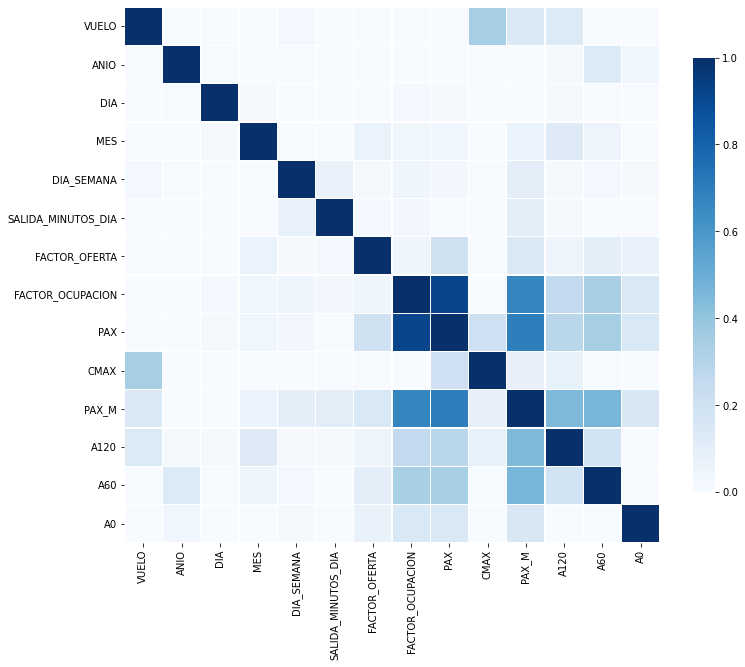

In [45]:
heatmap = data_model[['VUELO','ANIO','DIA','MES','DIA_SEMANA','SALIDA_MINUTOS_DIA',
            'FACTOR_OFERTA','FACTOR_OCUPACION','PAX','CMAX','PAX_M','A120','A60','A0']].corr()

plt.figure(figsize=(12, 10))
g = sns.heatmap(heatmap, cmap="Blues", vmin= 0, vmax=1, square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})

**Ajustes Finales**

In [46]:
col_del = ['ID_VUELO','DIA','ANIO','CIA','FECHA_SALIDA_PROG','PAX_V','PAX_F']
col_res = ['PAX_M','A120','A60','A0']
colname_predict = 'PAX_M'

In [47]:
# Utilizamos un día (31/07/2021) para realizar una prueba evaluación del modelo, por ello lo copiamos y borramos
data_evaluate = data_model[(data_model["ANIO"] == 2021) & (data_model["MES"] == 7) & (data_model["DIA"] == 31)]
data_model = data_model.drop(
    data_model[(data_model["ANIO"] == 2021) & (data_model["MES"] == 7) & (data_model["DIA"] == 31)].index)

In [48]:
# Borramos las columnas que no vamos a usar en el modelo
data_model = data_model.drop(columns=col_del)

In [49]:
data_evaluate = data_evaluate.drop(columns=col_del)

In [50]:
data_model.columns.values

array(['VUELO', 'FACTOR_OFERTA', 'SALIDA_MINUTOS_DIA', 'MES',
       'DIA_SEMANA', 'FESTIVO', 'PAX', 'FACTOR_OCUPACION', 'CMAX',
       'PAX_M', 'A180', 'A120', 'A60', 'A0', 'APD_ACE', 'APD_FUE',
       'APD_GMZ', 'APD_LPA', 'APD_SPC', 'APD_TFN', 'APD_TFS', 'APD_VDE',
       'APA_ACE', 'APA_AGA', 'APA_BJL', 'APA_CMN', 'APA_DSS', 'APA_EUN',
       'APA_FNC', 'APA_FUE', 'APA_GMZ', 'APA_LIL', 'APA_LIS', 'APA_LPA',
       'APA_MRS', 'APA_NKC', 'APA_OVD', 'APA_PMI', 'APA_PNA', 'APA_RAK',
       'APA_REU', 'APA_RMU', 'APA_SDR', 'APA_SID', 'APA_SPC', 'APA_TFN',
       'APA_TFS', 'APA_TLS', 'APA_TRN', 'APA_VCE', 'APA_VDE', 'APA_VGO',
       'APA_VIL', 'APA_VIT', 'APA_XRY', 'APA_ZAZ', 'SEGMENTO_Domestico',
       'SEGMENTO_Interinsular', 'SEGMENTO_Internacional',
       'SEGMENTO_Schengen', 'FLOTA_ATR72-600-BINTER CANARIAS-72',
       'FLOTA_ATR72-600-CANARIAS AIRLINE-72',
       'FLOTA_ATR72-BINTER CANARIAS-72', 'FLOTA_ATR72-CANARYFLY-72',
       'FLOTA_CRJ1000-MEDOPS-100',
       'FLOTA_EMBRA

### Importancia de las características

In [51]:
# División de los datos (Split)
X = data_model.drop(columns=col_res,axis=1).values
X_eval = data_evaluate.drop(columns=col_res,axis=1).values
y = data_model[colname_predict]


print(X.shape)
print(y.shape)

print(X)
print(X_eval)

(127174, 112)
(127174,)
[[6.50000000e+02 1.00000000e+00 6.30000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.10000000e+02 1.00000000e+00 6.90000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.65100000e+03 1.00000000e+00 7.00000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.31000000e+02 9.92424242e-01 6.60000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.80000000e+02 1.00000000e+00 7.50000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.76000000e+02 1.00000000e+00 7.50000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[[6.04e+02 1.00e+00 4.80e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.07e+02 1.00e+00 4.80e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [5.04e+02 1.00e+00 4.95e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [5.21e+02 1.00e+00 5.25e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [6.59e+02 1.00e+00 6.00e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.57e+02 1.00e+00 1.26e+03 ... 0.00e+00 0.00e+00 0.00e+00]]


In [52]:
# Preparamos los datos de muestra
feature_names = [data_model.drop(columns=col_res).columns.values[i] for i in range(X.shape[1])]

#### Linear Regression

In [53]:
lrm = LinearRegression(fit_intercept = True)
lrm.fit(X, y)

LinearRegression()

In [54]:
X_columns = data_model.drop(columns=col_res).columns.values 
X_df = data_model.drop(columns=col_res)

In [55]:
print("y = ",lrm.intercept_," + ",end="")

for i in range(0, len(lrm.coef_)):
    print(lrm.coef_[i],"",X_columns[i]," + ",end="")
print("0")

y =  3.522006120425626  + 0.00044747654646241306  VUELO  + 5.702975351637567  FACTOR_OFERTA  + 9.192487442299946e-05  SALIDA_MINUTOS_DIA  + 0.10027813568775867  MES  + 0.24240467560110002  DIA_SEMANA  + 2.348225469633719  FESTIVO  + 0.3284842877025904  PAX  + 7.5075585980334765  FACTOR_OCUPACION  + -0.0035213209648787824  CMAX  + 0.4511774848501784  A180  + 1.2841511926584621  APD_ACE  + 2.1545418013258955  APD_FUE  + 1.494026696939518  APD_GMZ  + -5.902781962024191  APD_LPA  + 4.875116413321377  APD_SPC  + -5.468125035237715  APD_TFN  + -2.433900084574536  APD_TFS  + 3.9969709775908586  APD_VDE  + 2.63576207195987  APA_ACE  + 0.3479012184835362  APA_AGA  + -3.0056946770664705  APA_BJL  + -2.403428838371891  APA_CMN  + 0.7870772885843889  APA_DSS  + -2.7079939897121736  APA_EUN  + -0.5386888457794401  APA_FNC  + 3.180107028414028  APA_FUE  + 0.8003995160564473  APA_GMZ  + 0.6261005725230342  APA_LIL  + -2.42795915513792  APA_LIS  + -3.491992350121307  APA_LPA  + -1.8765249755678652  AP

In [56]:
features = pd.DataFrame(lrm.coef_,index=X_columns,columns=['Coeficiente'])
#feature.columns = ['Coeficiente']
#feature.index = X_columns
features['Coeficiente'] = features['Coeficiente'].abs()

features

,Coeficiente
VUELO,0.000447
FACTOR_OFERTA,5.702975
SALIDA_MINUTOS_DIA,0.000092
MES,0.100278
DIA_SEMANA,0.242405
...,...
MATR_EC-NHA,0.825605
MATR_EC-NJK,0.689558
MATR_EC-NMF,0.765256
MATR_EC-NNV,0.603625


**Desviaciones estándar**

In [57]:
stdevs = []

for i in X_columns:
    stdev = X_df[i].std()
    print(i,"->",stdev)
    stdevs.append(stdev) 

VUELO -> 1116.634008504692
FACTOR_OFERTA -> 0.08045302521266424
SALIDA_MINUTOS_DIA -> 266.57715939140604
MES -> 3.4642503817426626
DIA_SEMANA -> 1.9864810849288366
FESTIVO -> 0.158419074086646
PAX -> 18.42899143765009
FACTOR_OCUPACION -> 0.2346223285610373
CMAX -> 10.268014496609416
A180 -> 9.445606746042413
APD_ACE -> 0.32299509863385945
APD_FUE -> 0.30025892178030655
APD_GMZ -> 0.12407860854739257
APD_LPA -> 0.46343187132545427
APD_SPC -> 0.30025892178030655
APD_TFN -> 0.45655772561895314
APD_TFS -> 0.14824232610022695
APD_VDE -> 0.18308080384325903
APA_ACE -> 0.3236351456203562
APA_AGA -> 0.03642982943341805
APA_BJL -> 0.022074582421242273
APA_CMN -> 0.032322217505719855
APA_DSS -> 0.033630844365198344
APA_EUN -> 0.04534248999972565
APA_FNC -> 0.05825133581611181
APA_FUE -> 0.30042637351232754
APA_GMZ -> 0.12441577215567669
APA_LIL -> 0.00841217751495457
APA_LIS -> 0.03675131470189847
APA_LPA -> 0.453485106390032
APA_MRS -> 0.006270165533061074
APA_NKC -> 0.042211183198215874
APA_OV

In [58]:
features['STD'] =np.array(stdevs).reshape(-1,1)
features['Importancia'] = features['STD']*features['Coeficiente']
features['Importancia_Normalizada'] = 100*features['Importancia'] / features['Importancia'].max()

features

,Coeficiente,STD,Importancia,Importancia_Normalizada
VUELO,0.000447,1116.634009,0.499668,8.254009
FACTOR_OFERTA,5.702975,0.080453,0.458822,7.579276
SALIDA_MINUTOS_DIA,0.000092,266.577159,0.024505,0.404799
MES,0.100278,3.464250,0.347389,5.738513
DIA_SEMANA,0.242405,1.986481,0.481532,7.954434
...,...,...,...,...
MATR_EC-NHA,0.825605,0.069931,0.057736,0.953737
MATR_EC-NJK,0.689558,0.124140,0.085602,1.414055
MATR_EC-NMF,0.765256,0.101274,0.077501,1.280232
MATR_EC-NNV,0.603625,0.026296,0.015873,0.262207


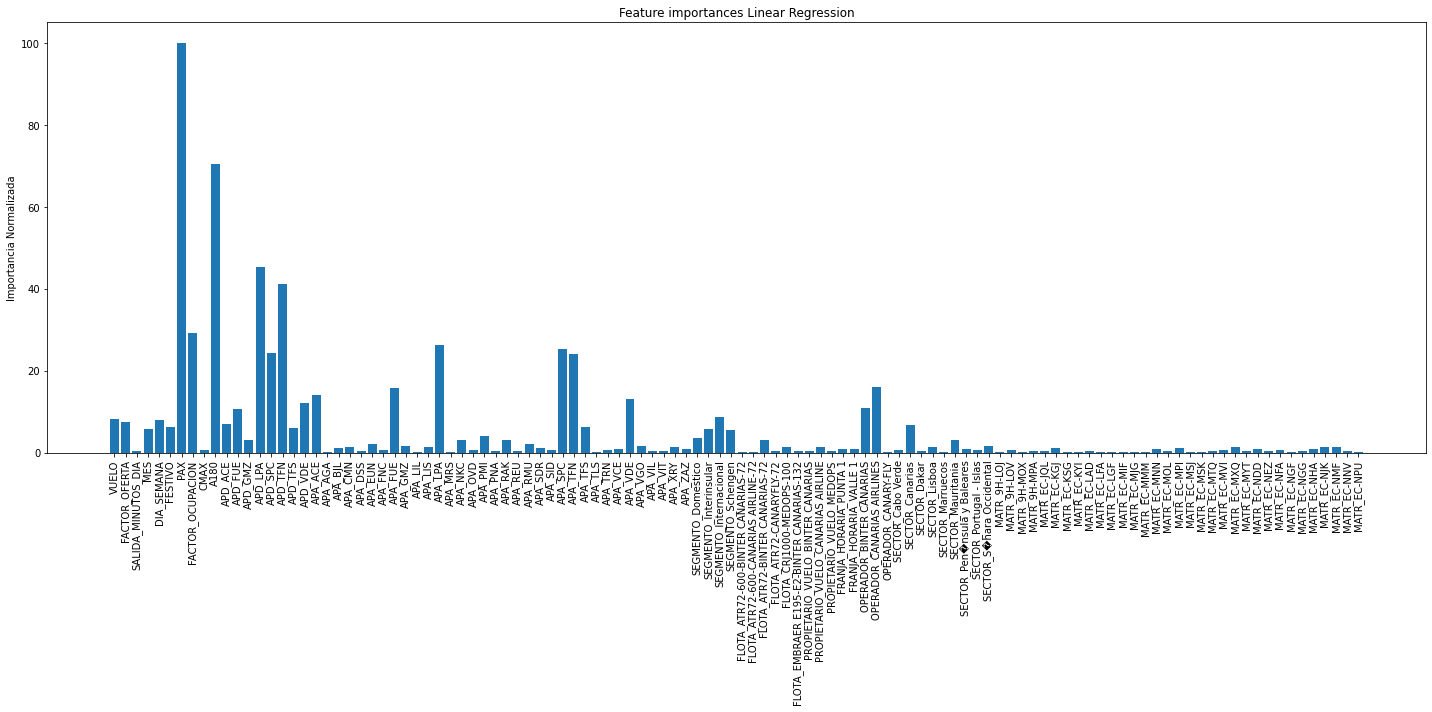

In [59]:
# Visualizamos en gráfico

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(features.index, features['Importancia_Normalizada'])
ax.set_title("Feature importances Linear Regression")
ax.set_ylabel("Importancia Normalizada")
plt.xticks(rotation=90)
fig.tight_layout()

#### Random Forest

In [60]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X, y)

RandomForestClassifier(random_state=0)

In [61]:
for i, column in enumerate(data_model.drop(columns=col_res,axis=1)):
    print('La importancia para {} es: {:.3f}'.format(column, rfc.feature_importances_[i]))

La importancia para VUELO es: 0.072
La importancia para FACTOR_OFERTA es: 0.010
La importancia para SALIDA_MINUTOS_DIA es: 0.075
La importancia para MES es: 0.092
La importancia para DIA_SEMANA es: 0.070
La importancia para FESTIVO es: 0.006
La importancia para PAX es: 0.100
La importancia para FACTOR_OCUPACION es: 0.100
La importancia para CMAX es: 0.001
La importancia para A180 es: 0.111
La importancia para APD_ACE es: 0.005
La importancia para APD_FUE es: 0.005
La importancia para APD_GMZ es: 0.001
La importancia para APD_LPA es: 0.007
La importancia para APD_SPC es: 0.004
La importancia para APD_TFN es: 0.008
La importancia para APD_TFS es: 0.001
La importancia para APD_VDE es: 0.002
La importancia para APA_ACE es: 0.006
La importancia para APA_AGA es: 0.000
La importancia para APA_BJL es: 0.000
La importancia para APA_CMN es: 0.000
La importancia para APA_DSS es: 0.000
La importancia para APA_EUN es: 0.000
La importancia para APA_FNC es: 0.000
La importancia para APA_FUE es: 0.006

In [62]:
start_time = time.time()
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Tiempo de cómputo: {elapsed_time:.3f} seconds")

Tiempo de cómputo: 0.294 seconds


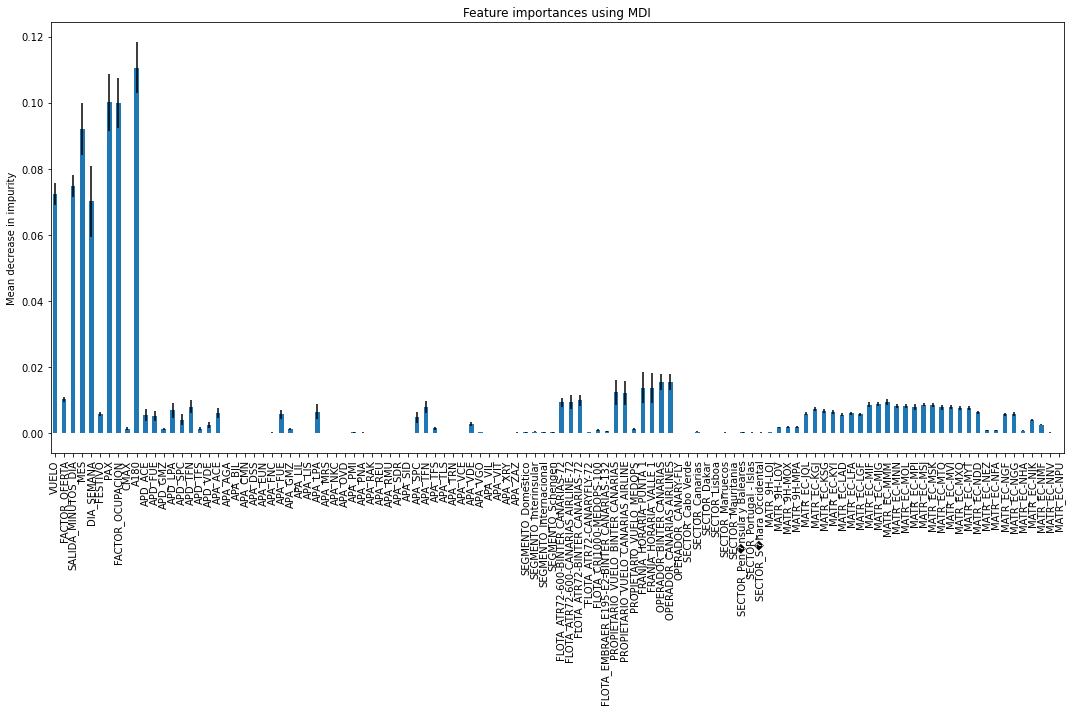

In [63]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Data Splitting - Validación Hold-out

In [64]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(101739, 112)
(25435, 112)
(101739,)
(25435,)


## Linear Regression

In [65]:
# Training the Regression
lrm = LinearRegression(fit_intercept = True)
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_train)

### Evaluación del Modelo

In [66]:
# Model Accuracy on training dataset
print('Accuracy (Training): ', lrm.score(X_train, y_train) )
print('Accuracy r2 (Training): ',r2_score(y_train,y_pred) )   
print("")
# Model Accuracy on testing dataset
print('Accuracy (Testing): ', lrm.score(X_test, y_test) )
print("")
# The Root Mean Squared Error (RMSE)
print('RMSE (Training): ',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE (Testing): ',sqrt(mean_squared_error(y_test,lrm.predict(X_test))))
print("")
# The Mean Absolute Error (MAE)
print('MAE (Training): ',mean_absolute_error(y_train,y_pred))
print('MAE (Testing): ',mean_absolute_error(y_test,lrm.predict(X_test)))

Accuracy (Training):  0.6960968466111759
Accuracy r2 (Training):  0.6960968466111759

Accuracy (Testing):  0.6965770148233875

RMSE (Training):  7.309210708596098
RMSE (Testing):  7.2485517340449706

MAE (Training):  5.5414206026564115
MAE (Testing):  5.517313069881422


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

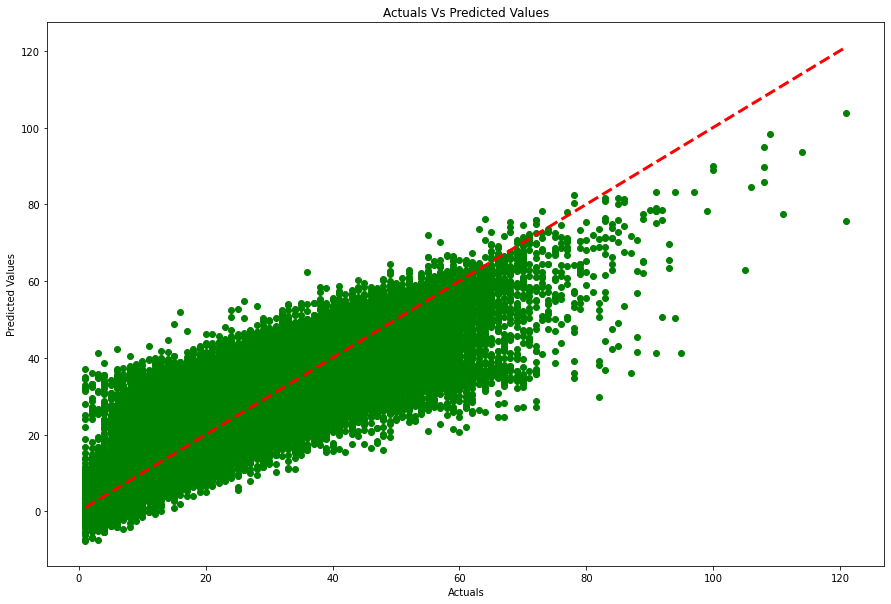

In [67]:
plt.figure(figsize=(15,10))
plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actuals Vs Residuals')

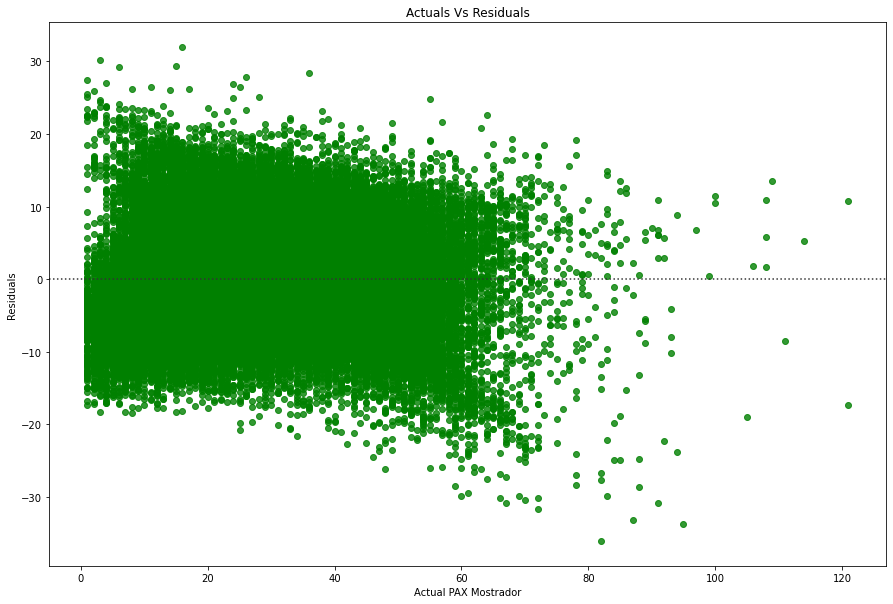

In [68]:
plt.figure(figsize=(15,10))
sns.residplot(y_train, y_pred, color='green')
plt.xlabel('Actual PAX Mostrador')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

### Predicción Linear Regression Model

In [69]:
y_evaluate_pred = lrm.predict(X_eval)

In [70]:
data_evaluate[colname_predict+'_PREDICT_LR'] = pd.DataFrame(y_evaluate_pred, columns = [colname_predict+'_PREDICT_LR']).values

## Random Forest Regression

In [71]:
rfm = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfm.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [72]:
# Model Accuracy on training dataset
print('Accuracy (Training): ', rfm.score(X_train, y_train) )
print('Accuracy r2 (Training): ',r2_score(y_train,y_pred) )   
print("")
# Model Accuracy on testing dataset
print('Accuracy (Testing): ', rfm.score(X_test, y_test) )
print("")
# The Root Mean Squared Error (RMSE)
print('RMSE (Training): ',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE (Testing): ',sqrt(mean_squared_error(y_test,rfm.predict(X_test))))
print("")
# The Mean Absolute Error (MAE)
print('MAE (Training): ',mean_absolute_error(y_train,y_pred))
print('MAE (Testing): ',mean_absolute_error(y_test,rfm.predict(X_test)))

y_predict_rfr = rfm.predict((X_test))

r_square = metrics.r2_score(y_test, y_predict_rfr)
print("")
print("")
print('R-Squared Error: ',r_square)

Accuracy (Training):  0.953946219607225
Accuracy r2 (Training):  0.6960968466111759

Accuracy (Testing):  0.7441835546888416

RMSE (Training):  7.309210708596098
RMSE (Testing):  6.6556616283507175

MAE (Training):  5.5414206026564115
MAE (Testing):  4.979284756350611


R-Squared Error:  0.7441835546888416


### Make a Prediction with Random Forest Regression model

In [73]:
y_eval_RF = rfm.predict(X_eval)

In [74]:
data_evaluate[colname_predict+'_PREDICT_RF'] = pd.DataFrame(y_eval_RF, columns = [colname_predict+'_PREDICT_RF']).values

## XGBoost Regression

In [75]:
# check xgboost version
import xgboost
import xgboost as xgb
print(xgboost.__version__)

1.5.0


In [76]:
xgb_r = xgb.XGBRegressor(
    n_estimators=1000, 
    max_depth=10, 
    eta=0.01, 
    subsample=1.0, 
    colsample_bytree=1.0)
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, enable_categorical=False,
             eta=0.01, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.00999999978,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [77]:
# Model Accuracy on training dataset
print('Accuracy (Training): ', xgb_r.score(X_train, y_train) )
print('Accuracy r2 (Training): ',r2_score(y_train,y_pred) )   
print("")
# Model Accuracy on testing dataset
print('Accuracy (Testing): ', xgb_r.score(X_test, y_test) )
print("")
# The Root Mean Squared Error (RMSE)
print('RMSE (Training): ',sqrt(mean_squared_error(y_train,y_pred)))
print('RMSE (Testing): ',sqrt(mean_squared_error(y_test,xgb_r.predict(X_test))))
print("")
# The Mean Absolute Error (MAE)
print('MAE (Training): ',mean_absolute_error(y_train,y_pred))
print('MAE (Testing): ',mean_absolute_error(y_test,xgb_r.predict(X_test)))

Accuracy (Training):  0.8447275555078869
Accuracy r2 (Training):  0.6960968466111759

Accuracy (Testing):  0.7814596413029734

RMSE (Training):  7.309210708596098
RMSE (Testing):  6.151667169029055

MAE (Training):  5.5414206026564115
MAE (Testing):  4.593884551009566


In [78]:
y_eval_XGB = xgb_r.predict(X_eval).flatten()

In [79]:
data_evaluate[colname_predict+'_PREDICT_XGB'] = pd.DataFrame(y_eval_XGB, columns = [colname_predict+'_PREDICT_XGB']).values

## Deep Learning Regression Model

In [80]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler

ss =StandardScaler()
X = ss.fit_transform(X)
X_eval = ss.fit_transform(X_eval)

print(X.shape)
print(y.shape)

print(X)
print(X_eval)

(127174, 112)
(127174,)
[[ 0.01233723  0.16301091 -0.81522688 ... -0.10233419 -0.02631434
  -0.01963281]
 [-0.4712609   0.16301091 -0.59015044 ... -0.10233419 -0.02631434
  -0.01963281]
 [ 5.38654539  0.16301091 -0.55263771 ... -0.10233419 -0.02631434
  -0.01963281]
 ...
 [-0.45245431  0.0688468  -0.70268866 ... -0.10233419 -0.02631434
  -0.01963281]
 [-0.31901705  0.16301091 -0.36507401 ... -0.10233419 -0.02631434
  -0.01963281]
 [-0.41215446  0.16301091 -0.36507401 ... -0.10233419 -0.02631434
  -0.01963281]]
[[-0.11215785  0.10482848 -1.408135   ...  0.         -0.07392213
  -0.12874232]
 [-0.44831895  0.10482848 -1.408135   ...  0.         -0.07392213
  -0.12874232]
 [-0.1797959   0.10482848 -1.35097288 ...  0.         -0.07392213
  -0.12874232]
 ...
 [-0.16829743  0.10482848 -1.23664863 ...  0.         -0.07392213
  -0.12874232]
 [-0.07495693  0.10482848 -0.95083803 ...  0.         -0.07392213
  -0.12874232]
 [-0.41449992  0.10482848  1.56429528 ...  0.         -0.07392213
  -0.128

In [81]:
print(X.shape)
print(y.shape)

(127174, 112)
(127174,)


In [82]:
def wider_model(n_features):
    model = keras.Sequential([
        layers.Dense(20,input_dim=n_features),
        layers.Dense(1)
    ])
    
    model.compile(loss='mse', metrics=['mae', 'mse'])
    
    return model

In [83]:
model = wider_model(X.shape[1])

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                2260      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


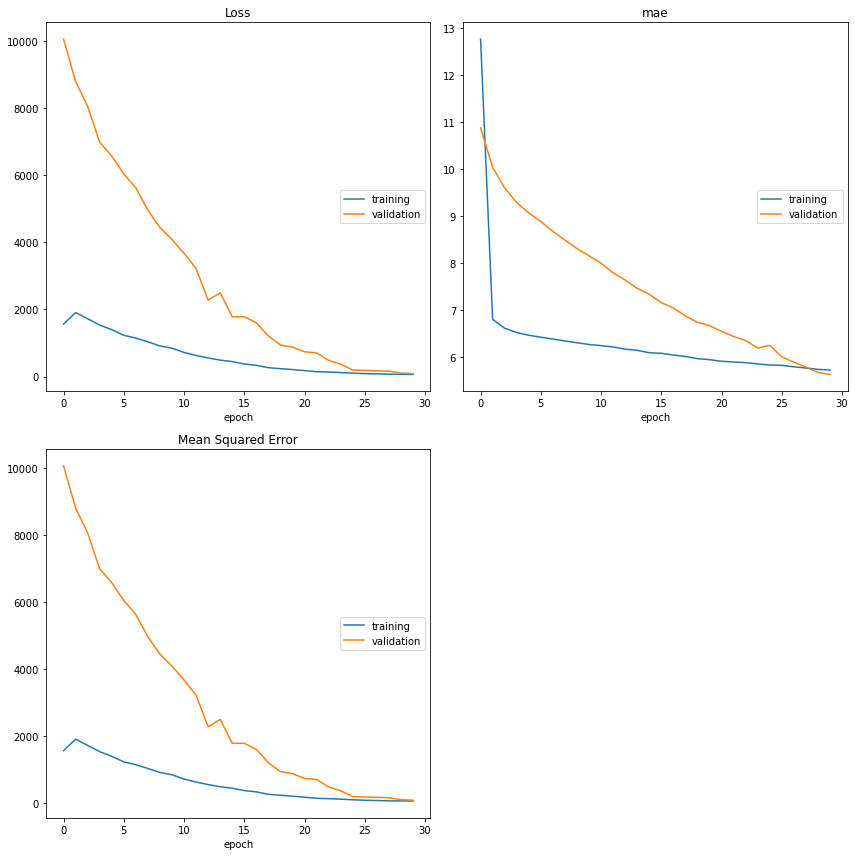

Loss
	training         	 (min:   61.949, max: 1907.629, cur:   61.949)
	validation       	 (min:   85.955, max: 10066.354, cur:   85.955)
mae
	training         	 (min:    5.718, max:   12.770, cur:    5.718)
	validation       	 (min:    5.624, max:   10.881, cur:    5.624)
Mean Squared Error
	training         	 (min:   61.949, max: 1907.629, cur:   61.949)
	validation       	 (min:   85.955, max: 10066.354, cur:   85.955)


In [85]:
from livelossplot import PlotLossesKeras
history = model.fit(
  X, y,
  epochs=30, validation_split = 0.3, verbose=0,
  callbacks=[PlotLossesKeras()])

In [86]:
y_eval_NN = model.predict(X_eval).flatten()

In [87]:
data_evaluate[colname_predict+'_PREDICT_NN'] = pd.DataFrame(y_eval_NN, columns = [colname_predict+'_PREDICT_NN']).values

## Resultados

In [88]:
# Exportamos a Excel
data_evaluate.to_excel ('export_predict.xlsx', index = False, header=True)